# **Credit Card Payment Prediction**

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/iamnaveen1401/Datasets/refs/heads/main/default%20of%20credit%20card%20clients.csv")
df.head()

,ID,Limit_Bal,Gender,Education,Marital_Status,Age,Repayment_Status,Bill_Amt,Pay_Amt,Default_Payment
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,-1,2682,0,1
2,3,90000,2,2,2,34,0,29239,1518,0
3,4,50000,2,2,1,37,0,46990,2000,0
4,5,50000,1,2,1,57,-1,8617,2000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                30000 non-null  int64
 1   Limit_Bal         30000 non-null  int64
 2   Gender            30000 non-null  int64
 3   Education         30000 non-null  int64
 4   Marital_Status    30000 non-null  int64
 5   Age               30000 non-null  int64
 6   Repayment_Status  30000 non-null  int64
 7   Bill_Amt          30000 non-null  int64
 8   Pay_Amt           30000 non-null  int64
 9   Default_Payment   30000 non-null  int64
dtypes: int64(10)
memory usage: 2.3 MB


In [10]:
# Feature selection
X = df.drop(columns=['ID','Default_Payment'])
y = df['Default_Payment']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## **Rondom Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators : int, default=100 -  The number of trees in the forest.
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=2)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8155

In [13]:
# Prediction
y_pred = rf_clf.predict(X_test)
# Evaluate 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8155

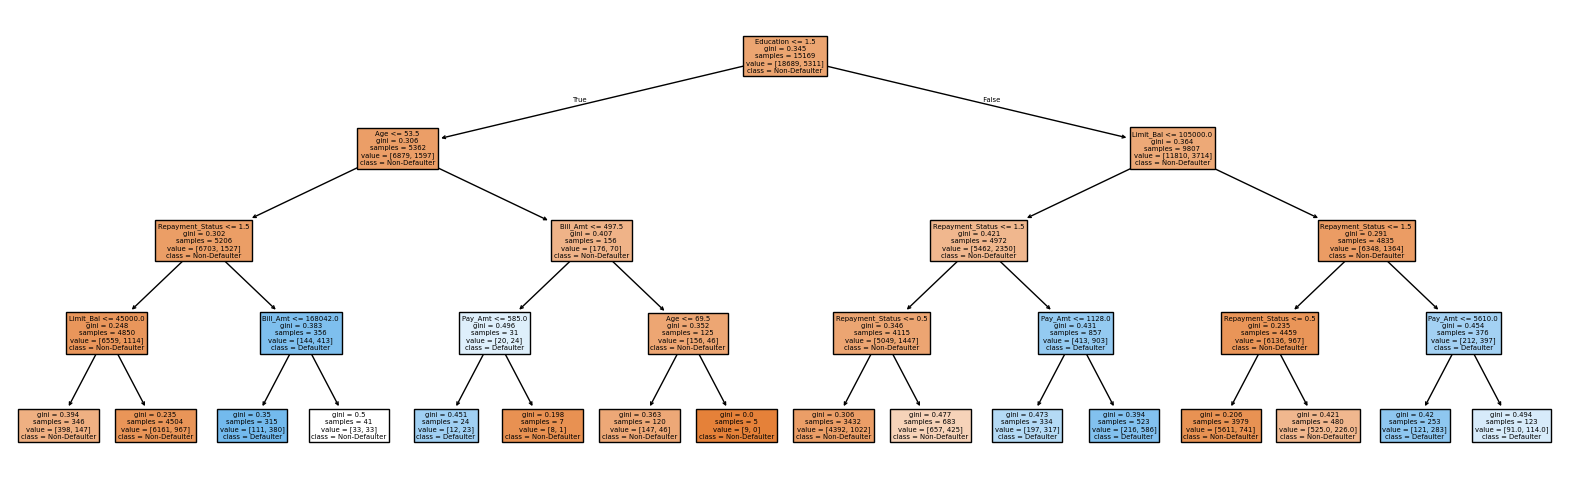

In [14]:
# Plot the Random forest - it have no of decision trees 
# we plot estimators_[7] - 7th tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,6))
plot_tree(rf_clf.estimators_[7], feature_names=X.columns, class_names=['Non-Defaulter','Defaulter'], filled=True)
plt.show()

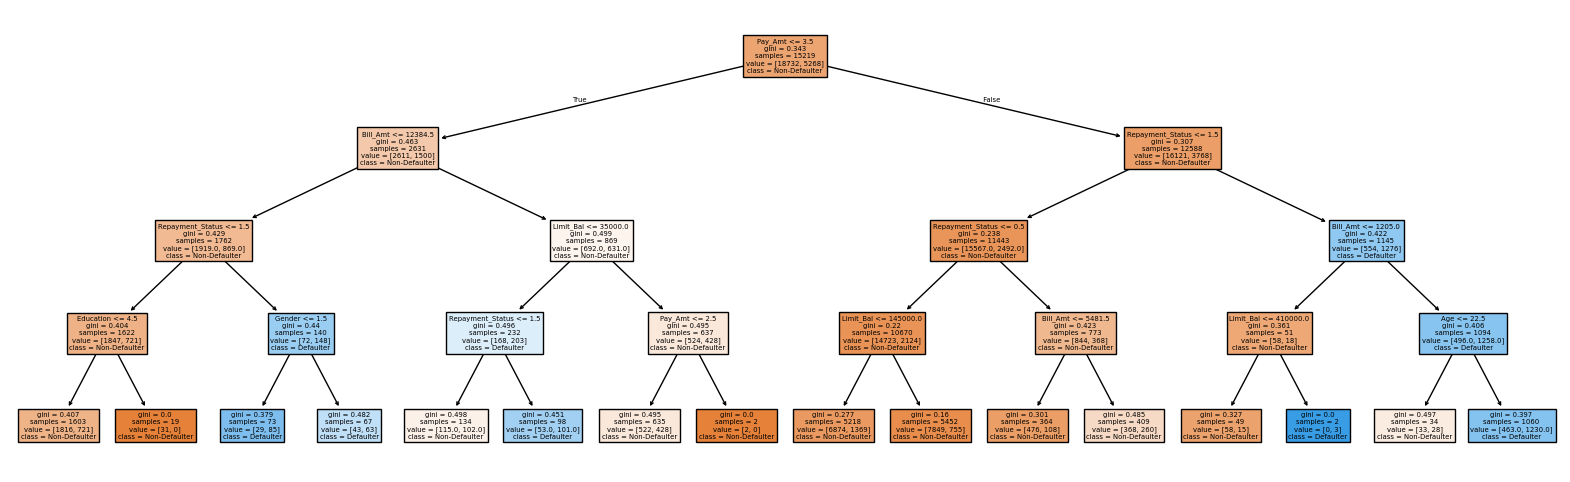

In [15]:
# Plot the Random forest - it have no of decision trees 
# we plot estimators_[199] - 199th tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,6))
plot_tree(rf_clf.estimators_[199], feature_names=X.columns, class_names=['Non-Defaulter','Defaulter'], filled=True)
plt.show()

In [27]:
X.columns

Index(['Limit_Bal', 'Gender', 'Education', 'Marital_Status', 'Age',
       'Repayment_Status', 'Bill_Amt', 'Pay_Amt'],
      dtype='object')

## **AdaBoost (Adaptive Boosting)**

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crate a base learner (DecisionTreeClassifier)
base_learner = DecisionTreeClassifier(max_depth=4)

# Adaboost Model
ada_clf = AdaBoostClassifier(estimator=base_learner, n_estimators=200, algorithm='SAMME')
ada_clf.fit(X_train, y_train)

# score
print("Score : ",ada_clf.score(X_test, y_test))

# Prediction
y_pred = ada_clf.predict(X_test)

# Evalute
print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.4f}")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Score :  0.8168333333333333
Accuracy Score : 0.8168


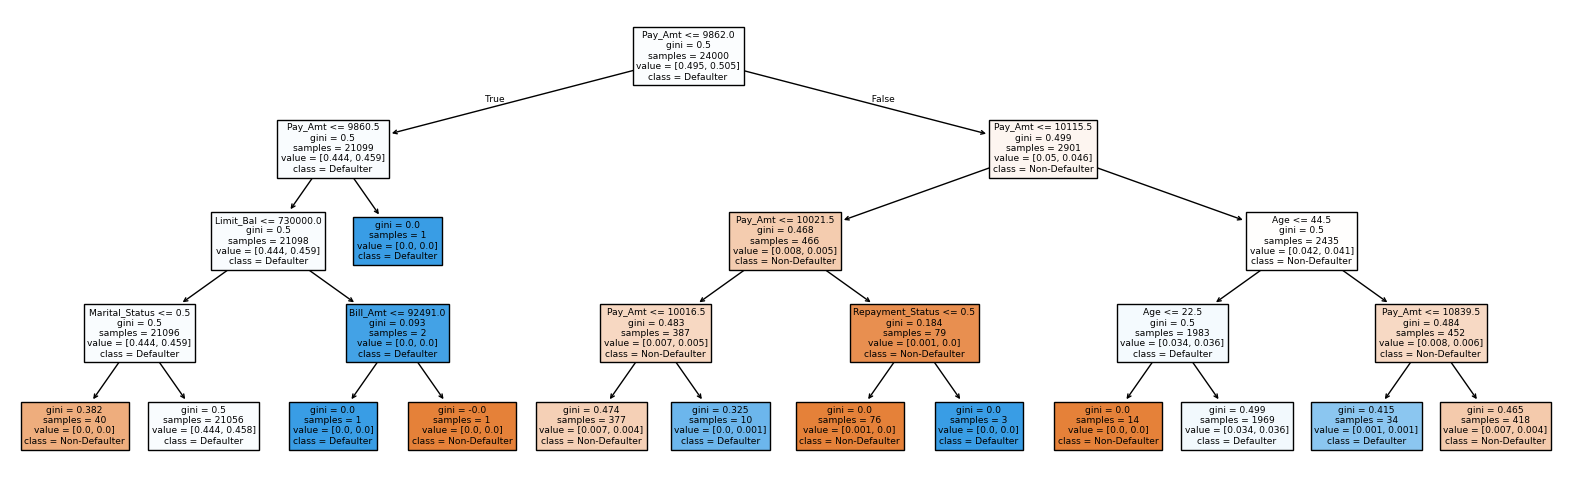

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,6))
plot_tree(ada_clf.estimators_[199], feature_names=X.columns, class_names=['Non-Defaulter','Defaulter'], filled=True)
plt.show()

## **Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=200)
gb_clf.fit(X_train, y_train)

# score
print("Score : ",gb_clf.score(X_test, y_test))

# Prediction
y_pred = gb_clf.predict(X_test)

# Evalute
print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.4f}")


Score :  0.8191666666666667
Accuracy Score : 0.8192


## **XGBoost**

In [28]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1)
xgb_clf.fit(X_train, y_train)

# score
print("Score : ",xgb_clf.score(X_test, y_test))

# Prediction
y_pred = xgb_clf.predict(X_test)

# Evalute
print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.4f}")

Score :  0.819
Accuracy Score : 0.8190


## **CatBoost**
 * Handle the numerical missing value - model parameter - nan_mode='Max' or Min
 * Handle the Encoding - model parameter - cat_features=['Gender','Status']


In [26]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=10, learning_rate=0.05, depth=4) # cat_features=['Gender','Status'] - auto encoding
cb_clf.fit(X_train, y_train)

# score
print("Score : ",cb_clf.score(X_test, y_test))

# Prediction
y_pred = cb_clf.predict(X_test)

# Evalute
print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.4f}")

0:	learn: 0.6720228	total: 156ms	remaining: 1.41s
1:	learn: 0.6529503	total: 159ms	remaining: 636ms
2:	learn: 0.6358615	total: 162ms	remaining: 377ms
3:	learn: 0.6203155	total: 165ms	remaining: 247ms
4:	learn: 0.6061088	total: 168ms	remaining: 168ms
5:	learn: 0.5929339	total: 171ms	remaining: 114ms
6:	learn: 0.5807771	total: 174ms	remaining: 74.7ms
7:	learn: 0.5695824	total: 178ms	remaining: 44.4ms
8:	learn: 0.5601514	total: 180ms	remaining: 20ms
9:	learn: 0.5505390	total: 184ms	remaining: 0us
Score :  0.8193333333333334
Accuracy Score : 0.8193
